In [1]:
# import all the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py

from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # ttrain set labels
    
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # change to row vector
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0])) # change to row vector
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# loading the data from h5 file
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0] , it is a non-cat


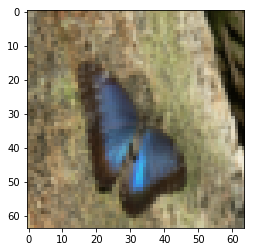

In [4]:
# example a picture from train set
index = 51

plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + " , it is a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)" )
print("train_set_x shape is: " + str(train_set_x_orig.shape))
print("train_set_y shape is: " + str(train_set_y.shape))
print("test_set_x shape is: " + str(test_set_x_orig.shape))
print("test_set_y shape is: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px 64
Each image is of size: (64, 64, 3)
train_set_x shape is: (209, 64, 64, 3)
train_set_y shape is: (1, 209)
test_set_x shape is: (50, 64, 64, 3)
test_set_y shape is: (1, 50)


In [6]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))



train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [7]:
# sanity check
print("sanity check after retrshaping: " + str(train_set_x_flatten[0:5, 0]))

sanity check after retrshaping: [17 31 56 22 33]


In [8]:
# Standardize datasets
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [9]:
# Sigmoid Function

def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size
    
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    
    return s

In [10]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


In [11]:
# Initializing parameters

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for W and initialize 0 for b
    
    Argument:
    dim -- size of the W vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    W = np.zeros((dim, 1))
    b = 0
    
    assert(W.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return W, b

In [12]:
dim = 2
W, b = initialize_with_zeros(dim)
print("W = " + str(W))
print("b = " + str(b))

W = [[ 0.]
 [ 0.]]
b = 0


In [13]:
# Propagate

def propagate(W, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    W -- Weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar 
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non cat, 1 if cat) of size (1, number of examples)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dW -- gradient of the loss with respect to W, thus same shape as W
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # Forward Propagation 
    A = sigmoid(np.dot(W.T, X) + b) # compute activation function
    cost = -1 / m * sum(np.dot(np.log(A), Y.T), np.dot(np.log(1 - A), (1 - Y.T)))
    
    # Backward Propagation
    dW = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dW": dW, 
             "db": db}
    
    return grads, cost

In [14]:
W, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(W, b, X, Y)
print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dW = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.000064773192205


In [15]:
# Optimize 
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes W and b by running a gradient descent algorithm
    
    Arguments:
    W -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true label vector (containing 0 if non-cat, 1 if cat) of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights W and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve
    
    Tips:
    - Calculate the cost and the gradients for the current parameters.
    - Update the parameters using gradient descent rule
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Compute the cost and the gradient by propagate()
        grads, cost = propagate(W, b, X, Y)
        
        dW = grads["dW"]
        db = grads["db"]
        # Update the parameters using gradient
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        # Record the cost
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

        
    params = {"W": W,
              "b": b}
    
    
    return params, grads, costs

In [16]:
params, grads, costs = optimize(W, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=True)
print("W: " + str(params["W"]))
print("b: " + str(params["b"]))
print("dW: " + str(grads["dW"]))
print("db: " + str(grads["db"]))

Cost after iteration 0: 6.000065
W: [[ 0.1124579 ]
 [ 0.23106775]]
b: 1.55930492484
dW: [[ 0.90158428]
 [ 1.76250842]]
db: 0.430462071679


In [17]:
# Predict Function

def predict(W, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters
    
    Arguments:
    W -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_predictions -- a numpy array (vector) containing all predictions (0/1) for the input
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    # Compute A
    A = sigmoid(np.dot(W.T, X) + b)
    
    # Update Y_prediction
    Y_prediction = A > 0.5
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
    
    

In [18]:
print("Predictions = " + str(predict(W, b, X)))

Predictions = [[ True  True]]


In [19]:
# A Model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the helper functions
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, number of examples)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, number of examples)
    X_test -- test set represented by a numpy array of shape (num_px * num_px *3, number of test examples)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, number of test examples)
    num_iterations -- hyperparameter representing the number of iterations to optimize the cost
    learning_rate -- hyperparameter representing the learning rate used in the update rules of parameters
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model
    """
    
    # Initialize parameter
    W, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient Descent
    parameters, grads, costs = optimize(W, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameter W and b from dictionary parameters
    W = parameters["W"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_train = predict(W, b, X_train)
    Y_prediction_test = predict(W, b, X_test)
    
    # Print train/test error
    print("Train Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "W": W,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [20]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Train Accuracy: 99.04306220095694 %
Test Accuracy: 70.0 %


In [21]:
wrong = np.abs(d["Y_prediction_test"] - test_set_y)

In [22]:
wrong.shape

(1, 50)

In [23]:
15/50

0.3

In [24]:
print(test_set_y[0, 30], d["Y_prediction_test"][0,30])

1 False


y = 1, you predicted that it is a non-cat picture


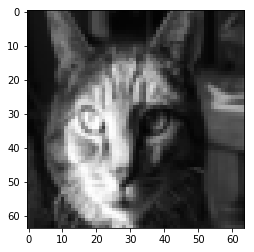

In [25]:
index = 30
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0, index]) + ", you predicted that it is a " + classes[int(d["Y_prediction_test"][0, index])].decode("utf-8") + " picture")

In [26]:
classes[1].decode("utf-8")

'cat'

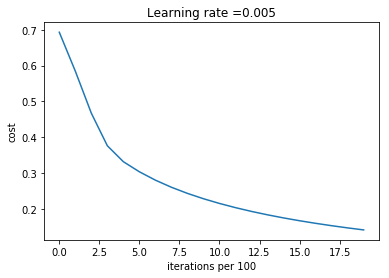

In [27]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations per 100')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Learning Rate is: 0.01
Train Accuracy: 99.52153110047847 %
Test Accuracy: 70.0 %

 --------------------------------
Learning Rate is: 0.001
Train Accuracy: 91.38755980861244 %
Test Accuracy: 68.0 %

 --------------------------------
Learning Rate is: 0.0001
Train Accuracy: 71.29186602870814 %
Test Accuracy: 40.0 %

 --------------------------------


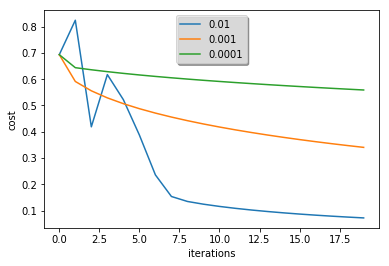

In [30]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print("Learning Rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=i, print_cost=False)
    print("\n " + "--------------------------------")
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.9')
plt.show()

Iterations: 100
Train Accuracy: 56.9377990430622 %
Test Accuracy: 82.0 %

 ---------------
Iterations: 1000
Train Accuracy: 98.56459330143541 %
Test Accuracy: 70.0 %

 ---------------
Iterations: 5000
Train Accuracy: 100.0 %
Test Accuracy: 68.0 %

 ---------------


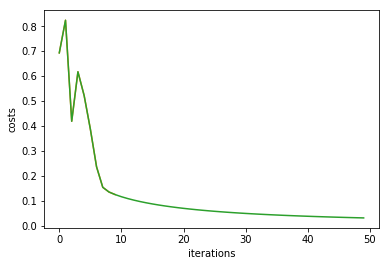

In [34]:
iterations = [100, 1000, 5000]
models = {}

for i in iterations:
    print("Iterations: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=i, learning_rate=0.01, print_cost=False)
    print("\n " + "---------------")
    
for i in iterations:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= models[str(i)]["num_iterations"])
    
plt.ylabel('costs')
plt.xlabel('iterations')


plt.show()